In [5]:
# import networkx
import lovelyplots
import networkx as nx
import numpy as np
import rustworkx as rx
import scienceplots
from rustworkx.visualization import graphviz_draw, mpl_draw
from scipy.optimize import minimize

from corral_crowding.allocation_optimizer import GateFidelityOptimizer
from corral_crowding.detuning_fit import compute_infidelity_parameters, decay_fit
from corral_crowding.module_graph import QuantumModuleGraph

In [6]:
[3.66966045, 5.13640275]
[3.33, 4.04]

[3.33, 4.04]

In [7]:
1 - 6.216490e-03

0.99378351

In [8]:
1 - 1.175726e-03

0.998824274

Qubit Frequencies: [3.33, 5.67, 4.04, 5.3] GHz
SNAIL Frequency: 4.69 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.340000 GHz → fidelity (no lifetime loss): 9.929820e-01, fidelity (with lifetime loss): 9.877480e-01
  Gate ('Q0', 'Q2'): 0.710000 GHz → fidelity (no lifetime loss): 7.241546e-01, fidelity (with lifetime loss): 7.230722e-01
  Gate ('Q0', 'Q3'): 1.970000 GHz → fidelity (no lifetime loss): 9.172094e-01, fidelity (with lifetime loss): 9.141368e-01
  Gate ('Q1', 'Q2'): 1.630000 GHz → fidelity (no lifetime loss): 4.844044e-01, fidelity (with lifetime loss): 4.831888e-01
  Gate ('Q1', 'Q3'): 0.370000 GHz → fidelity (no lifetime loss): 9.737553e-01, fidelity (with lifetime loss): 9.724890e-01
  Gate ('Q2', 'Q3'): 1.260000 GHz → fidelity (no lifetime loss): 9.119063e-01, fidelity (with lifetime loss): 9.101087e-01

Average Gate fidelity (no lifetime loss): 0.9241086238824316
Average Gate fidelity (with lifetime loss): 0.9151816697954991


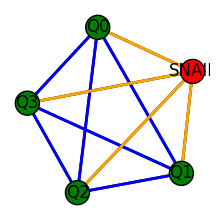

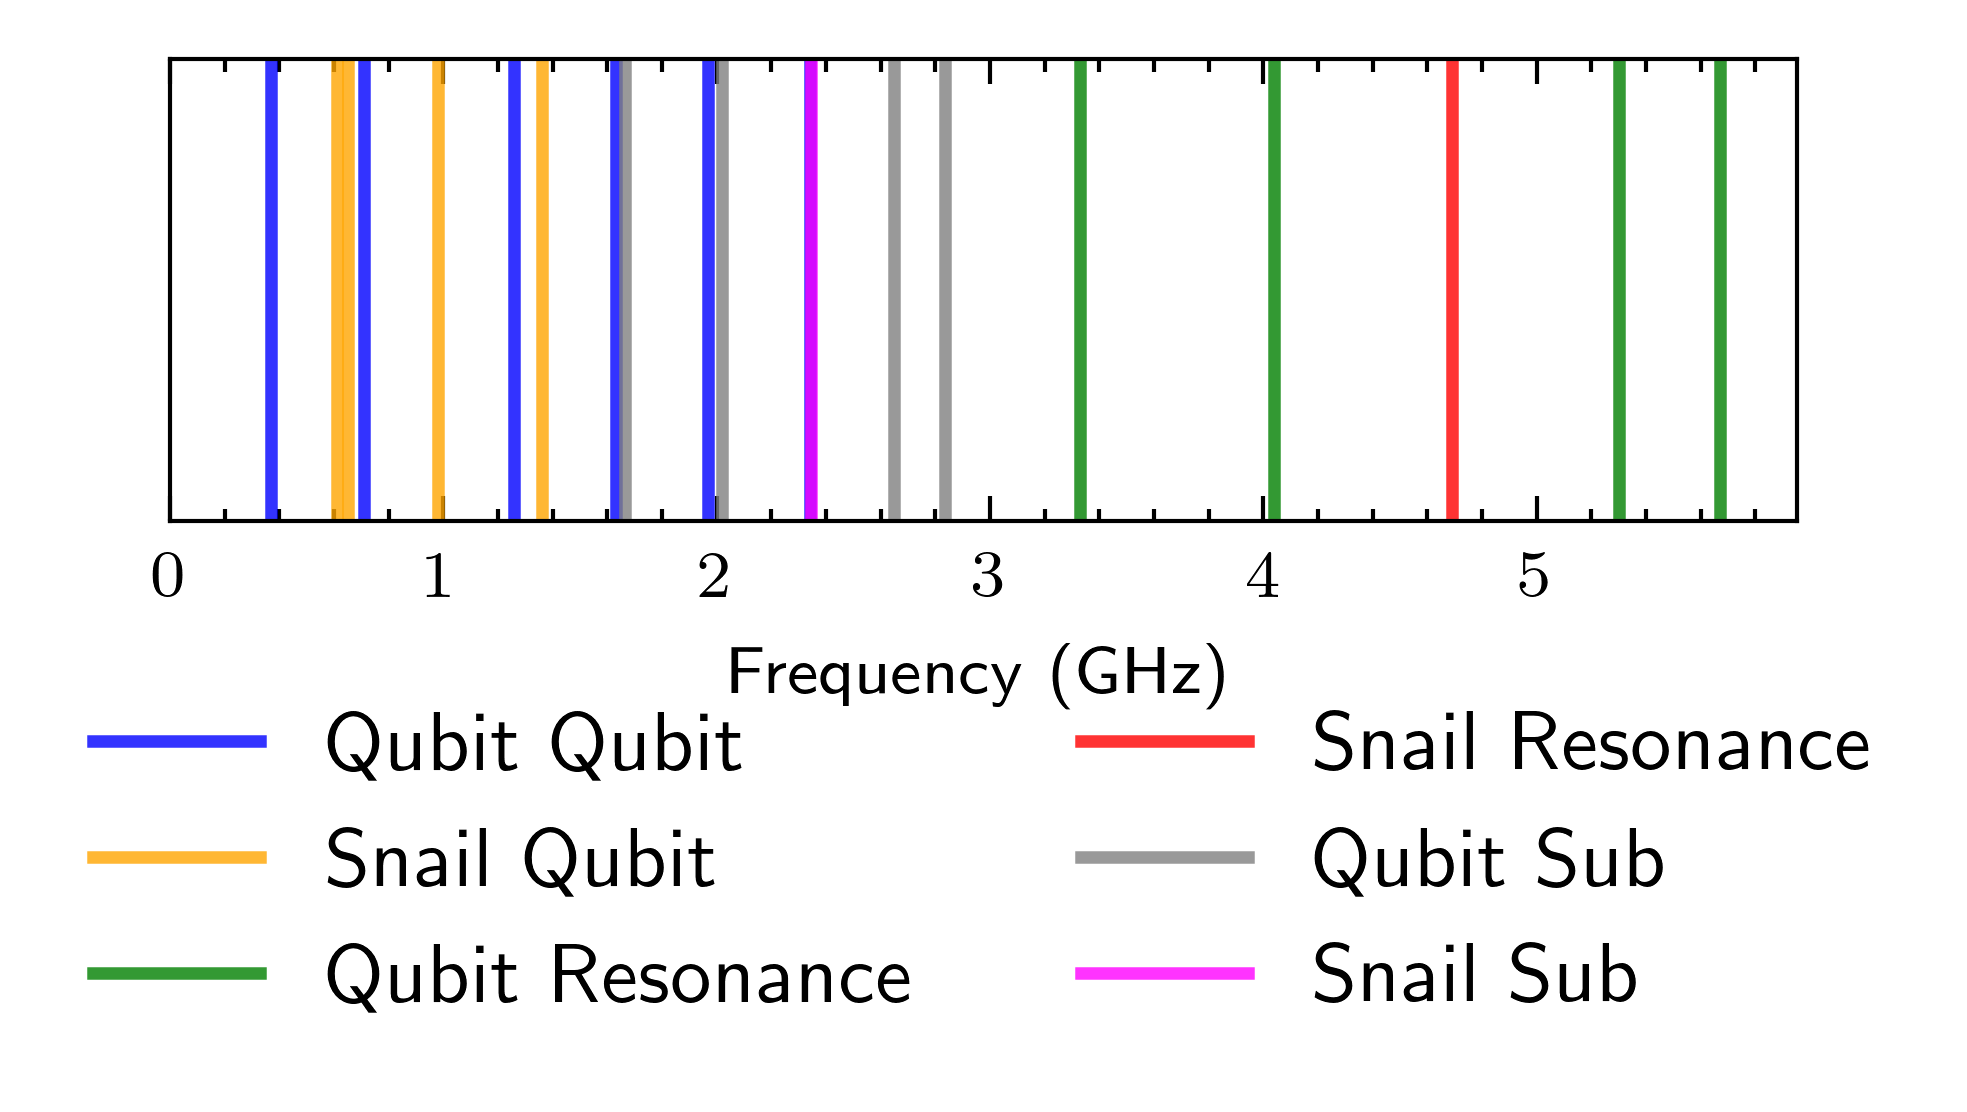

In [9]:
# baseline from Israa+Gaurav initial designs
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.12,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
optimizer.best_frequencies = [3.33, 5.67, 4.04, 5.30, 4.69]
# optimizer.best_frequencies = [3.33, 5.70, 5.13640275, 5.3, 4.69]
optimizer.report_results()

100%|██████████| 128/128 [00:16<00:00,  7.91it/s]


Optimization terminated successfully.
Qubit Frequencies: [5.37996398 3.90415521 4.10415531 5.6999642 ] GHz
SNAIL Frequency: 4.699995509804435 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 1.475809 GHz → fidelity (no lifetime loss): 9.908388e-01, fidelity (with lifetime loss): 9.886137e-01
  Gate ('Q0', 'Q2'): 1.275809 GHz → fidelity (no lifetime loss): 9.816621e-01, fidelity (with lifetime loss): 9.797148e-01
  Gate ('Q0', 'Q3'): 0.320000 GHz → fidelity (no lifetime loss): 9.785472e-01, fidelity (with lifetime loss): 9.773009e-01
  Gate ('Q1', 'Q2'): 0.200000 GHz → fidelity (no lifetime loss): 9.880128e-01, fidelity (with lifetime loss): 9.868086e-01
  Gate ('Q1', 'Q3'): 1.795809 GHz → fidelity (no lifetime loss): 9.853121e-01, fidelity (with lifetime loss): 9.825065e-01
  Gate ('Q2', 'Q3'): 1.595809 GHz → fidelity (no lifetime loss): 9.919831e-01, fidelity (with lifetime loss): 9.895637e-01

Average Gate fidelity (no lifetime loss): 0.9868857019109356
Average Gate fidelity (with lifetim

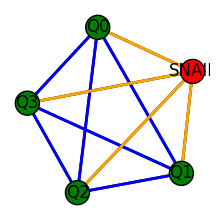

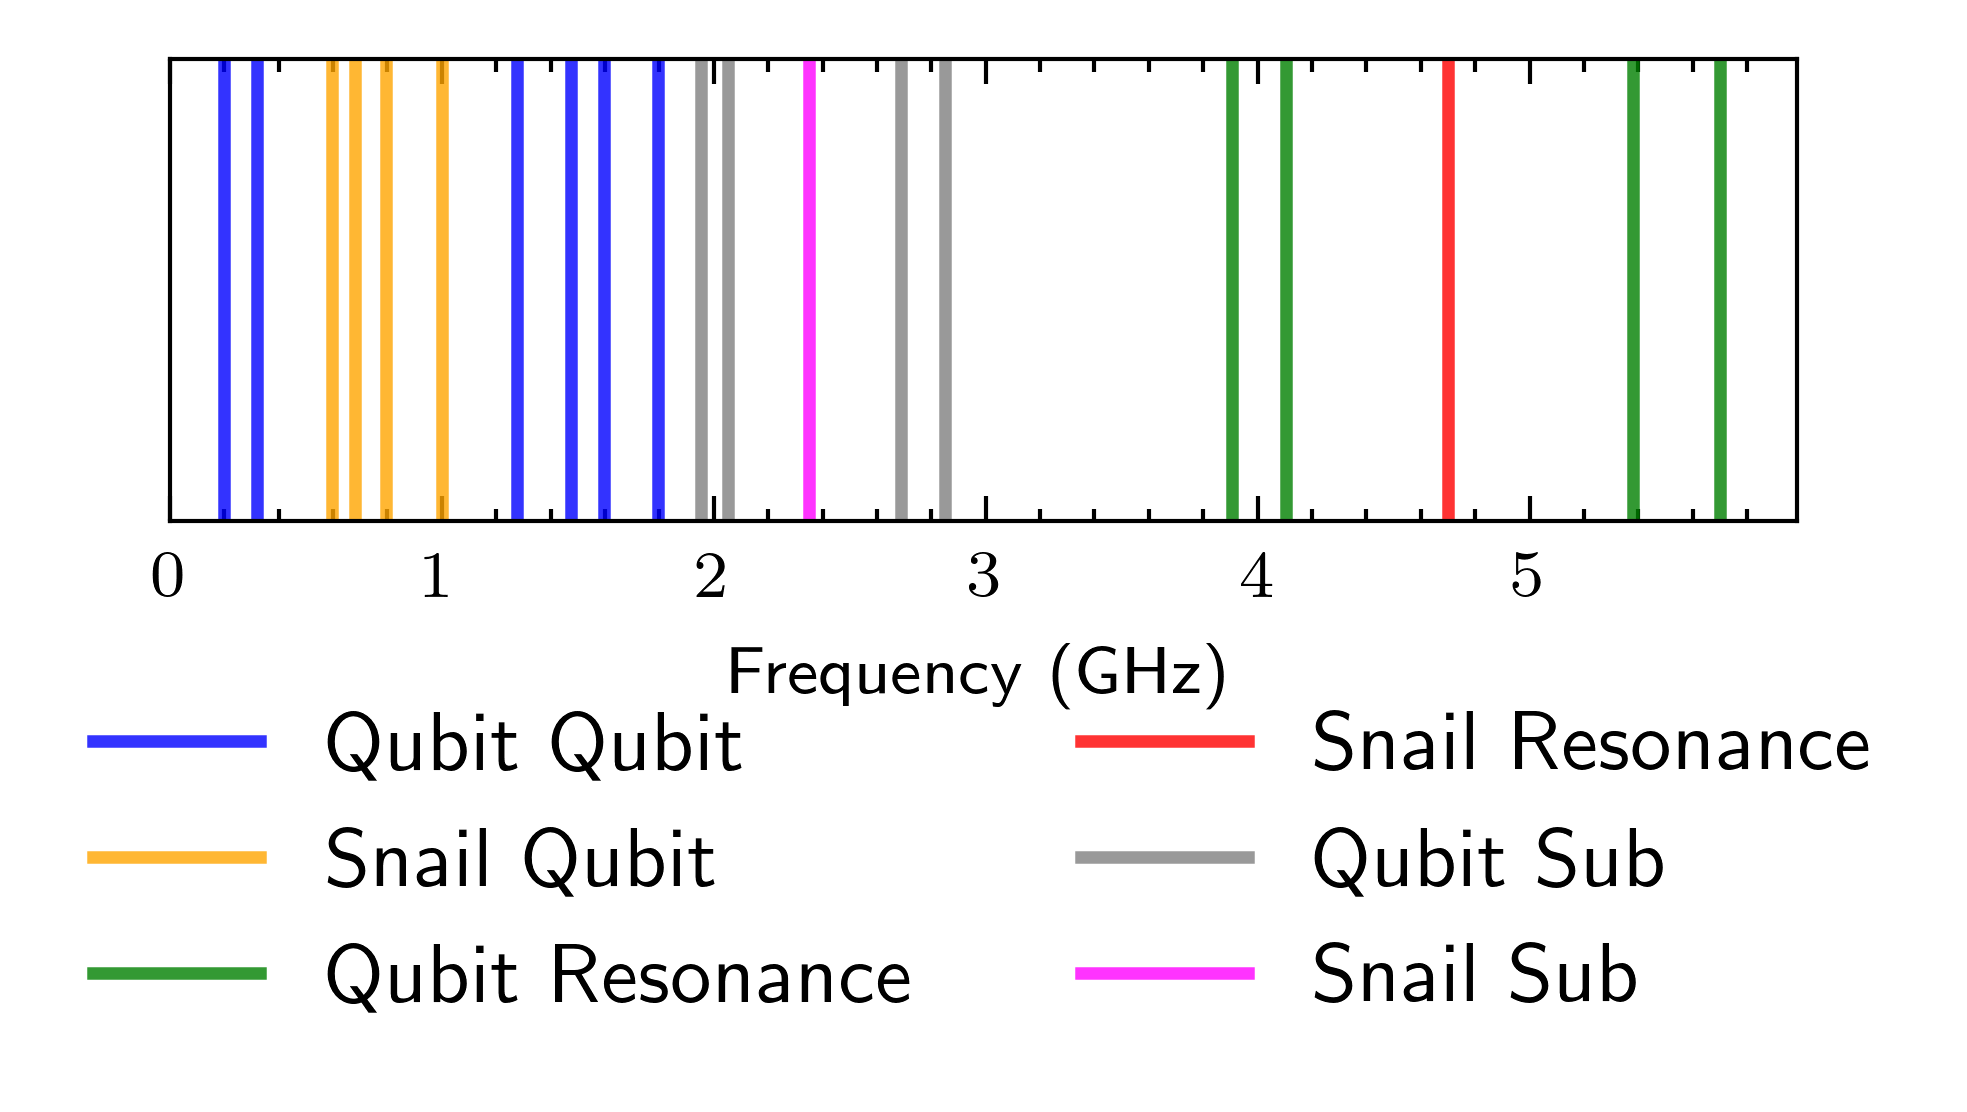

In [10]:
module = QuantumModuleGraph(num_qubits=4)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
    drop_k=0,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

Remaining standard module sizes:

100%|██████████| 128/128 [00:00<00:00, 130.61it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.7        5.49999935] GHz
SNAIL Frequency: 4.2 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.200001 GHz → fidelity (no lifetime loss): 9.988243e-01, fidelity (with lifetime loss): 9.968191e-01

Average Gate fidelity (no lifetime loss): 0.9988242821772718
Average Gate fidelity (with lifetime loss): 0.9968190555446459


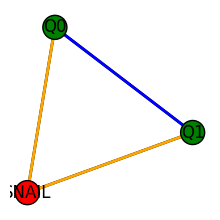

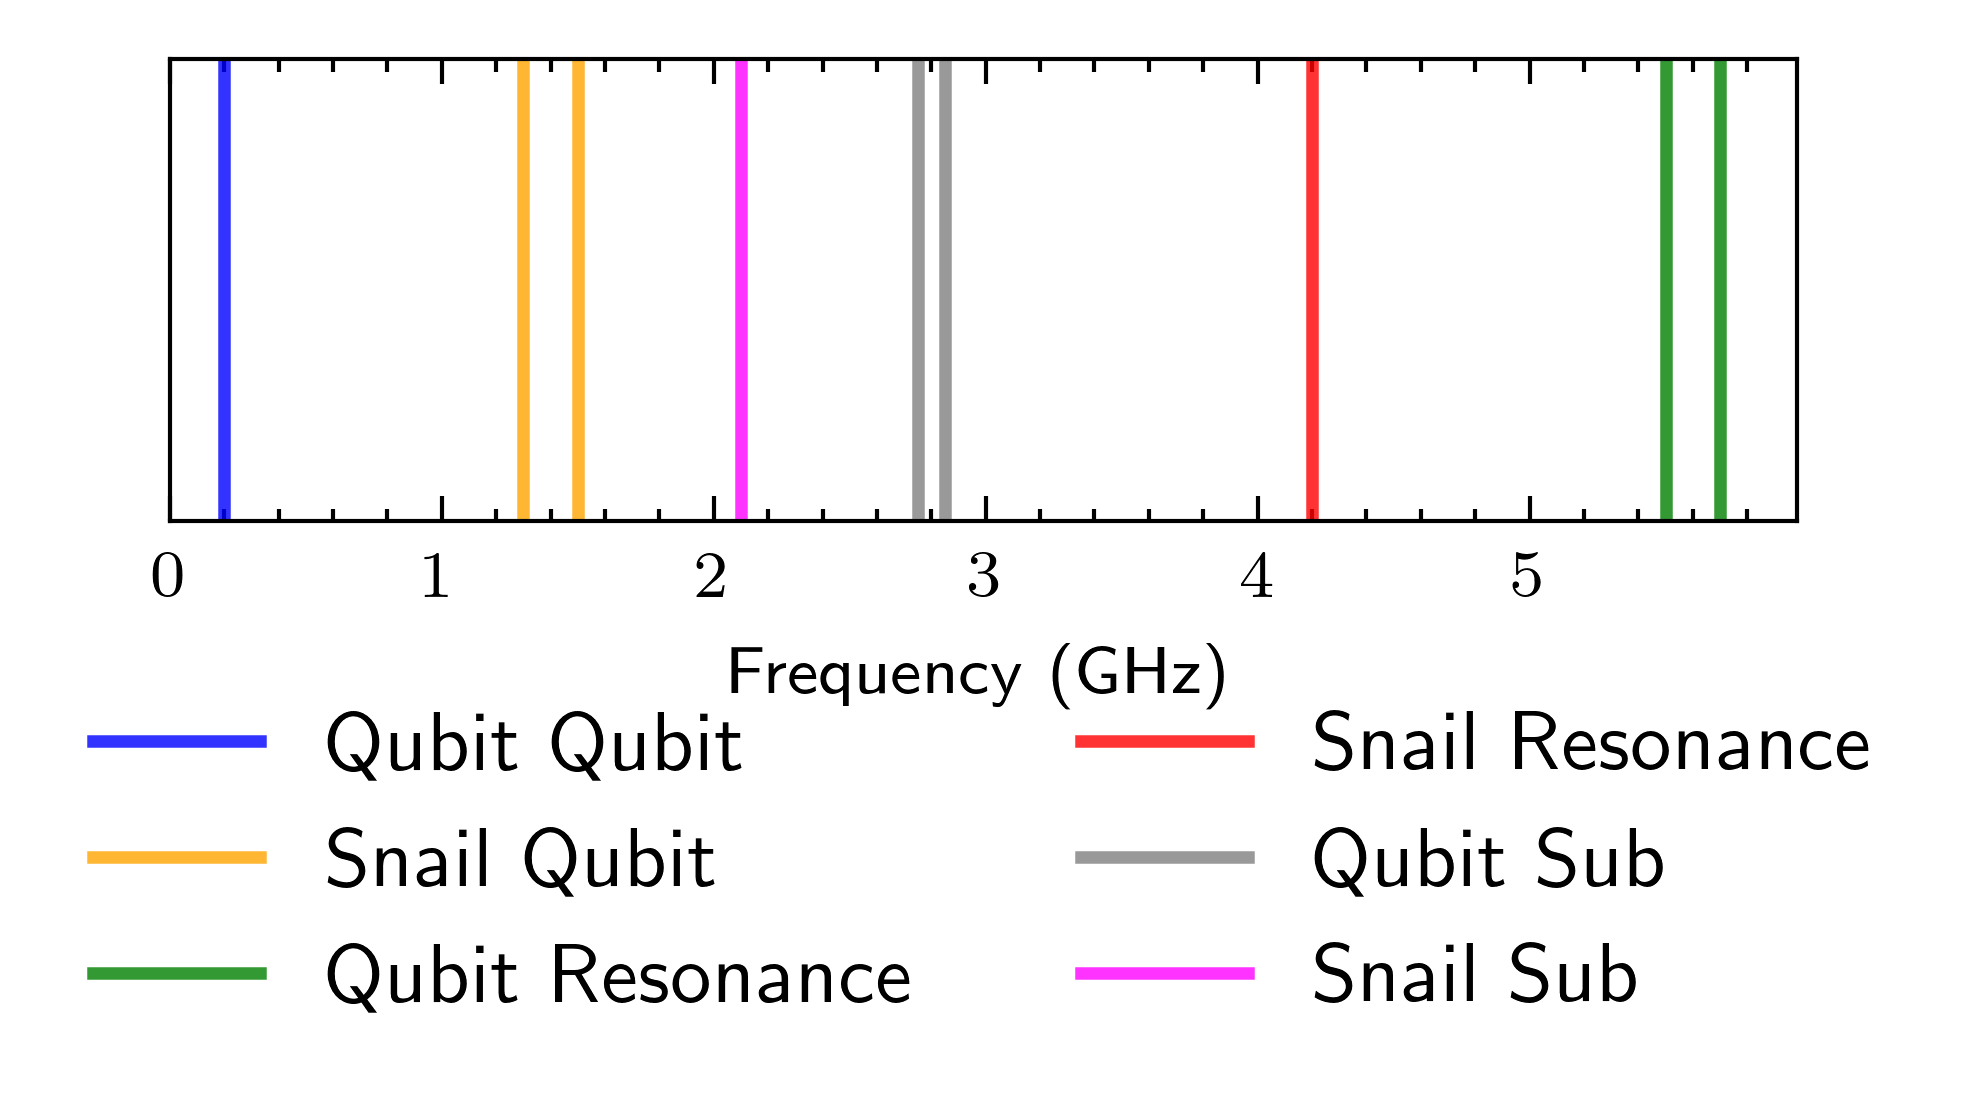

In [11]:
module = QuantumModuleGraph(num_qubits=2)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    T_1=80e-6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 128/128 [00:05<00:00, 25.39it/s]

Optimization terminated successfully.
Qubit Frequencies: [5.4829771  5.15957875 5.6863727 ] GHz
SNAIL Frequency: 4.200000000000036 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 0.323398 GHz → fidelity (no lifetime loss): 9.964677e-01, fidelity (with lifetime loss): 9.950655e-01
  Gate ('Q0', 'Q2'): 0.203396 GHz → fidelity (no lifetime loss): 9.973305e-01, fidelity (with lifetime loss): 9.959934e-01
  Gate ('Q1', 'Q2'): 0.526794 GHz → fidelity (no lifetime loss): 9.934795e-01, fidelity (with lifetime loss): 9.919530e-01

Average Gate fidelity (no lifetime loss): 0.9960530682103146
Average Gate fidelity (with lifetime loss): 0.9945814632934858


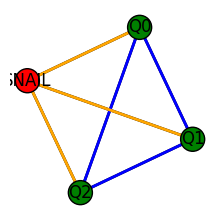

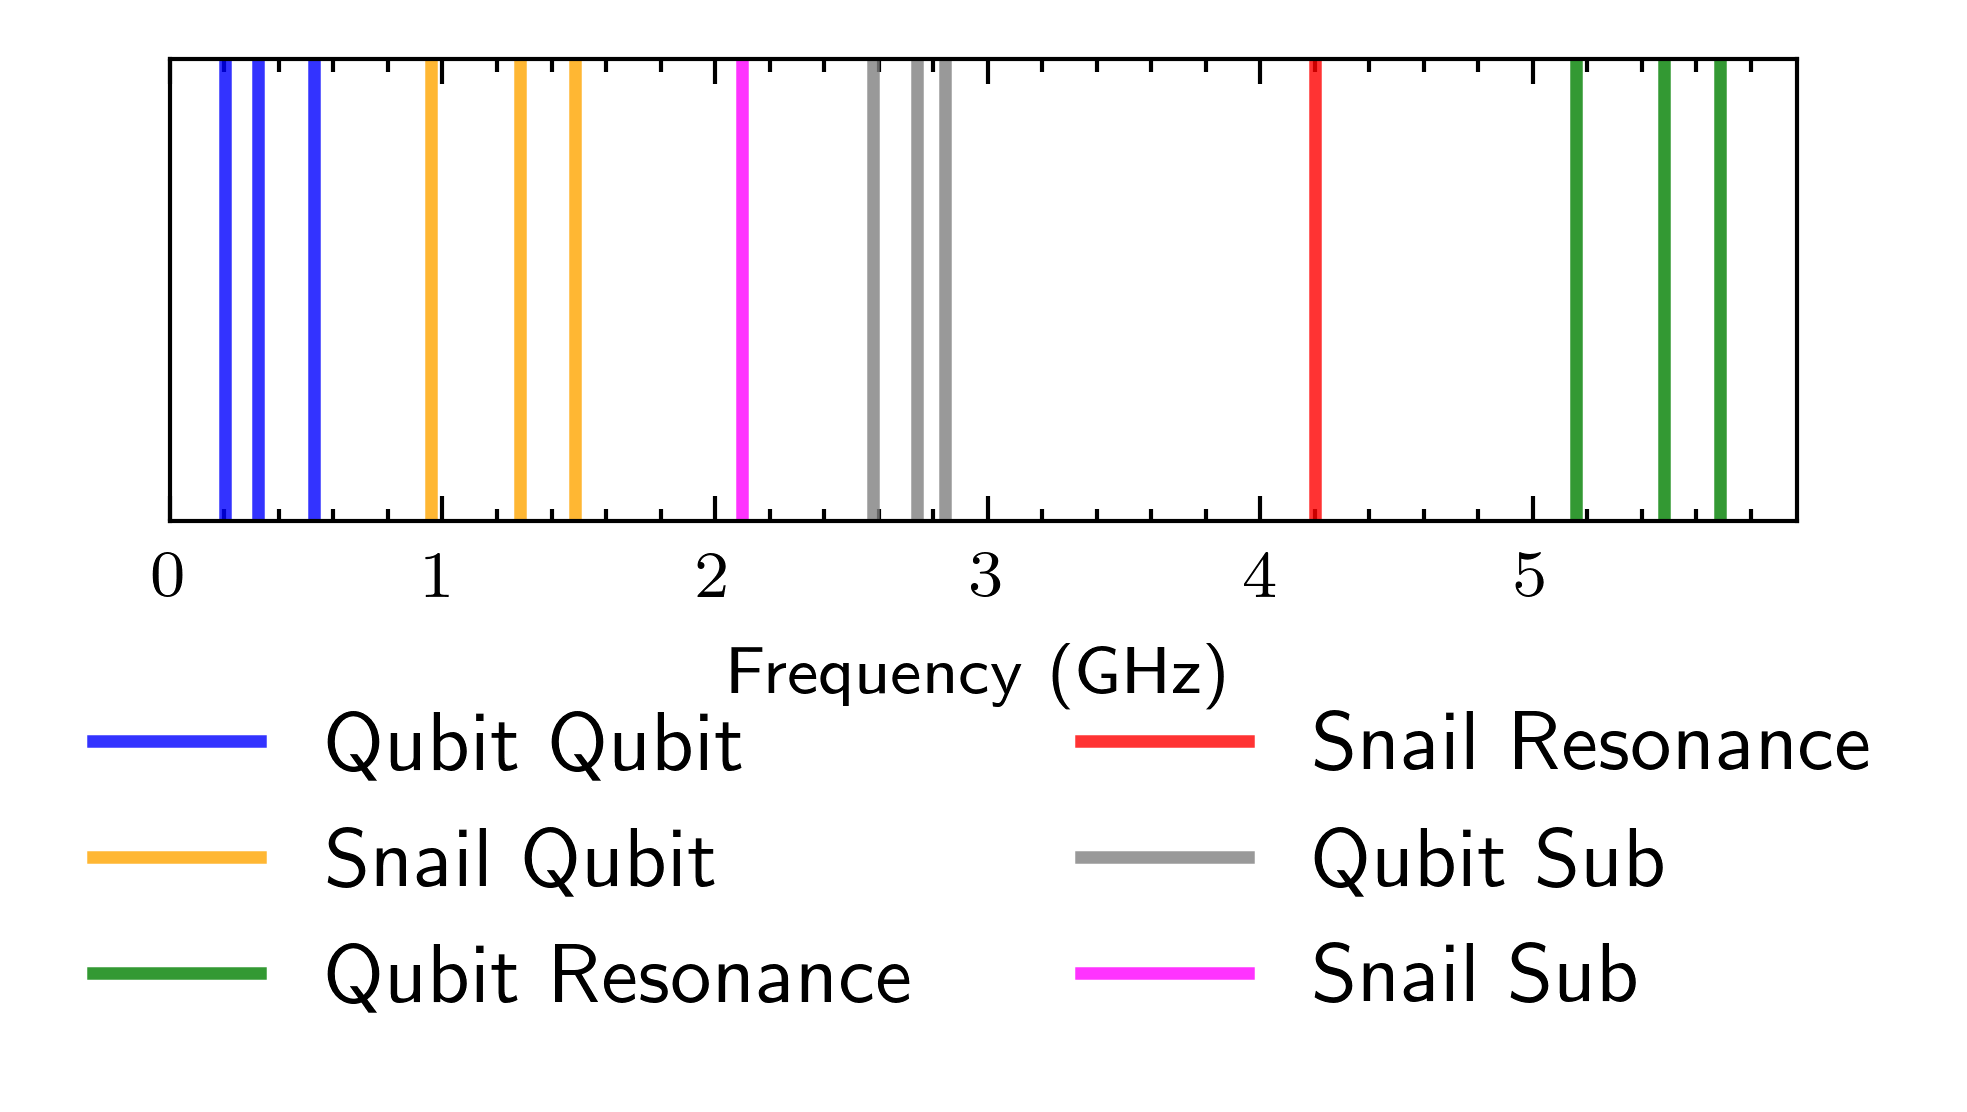

In [12]:
module = QuantumModuleGraph(num_qubits=3)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()

100%|██████████| 128/128 [00:38<00:00,  3.37it/s]


Optimization terminated successfully.
Qubit Frequencies: [5.66614065 3.3668845  5.36781469 3.54520923 4.10186131] GHz
SNAIL Frequency: 4.514620264886409 GHz
Gate Infidelities:
  Gate ('Q0', 'Q1'): 2.299256 GHz → fidelity (no lifetime loss): 9.912677e-01, fidelity (with lifetime loss): 9.863257e-01
  Gate ('Q0', 'Q2'): 0.298326 GHz → fidelity (no lifetime loss): 9.371207e-01, fidelity (with lifetime loss): 9.358946e-01
  Gate ('Q0', 'Q3'): 2.120931 GHz → fidelity (no lifetime loss): 9.538821e-01, fidelity (with lifetime loss): 9.497048e-01
  Gate ('Q0', 'Q4'): 1.564279 GHz → fidelity (no lifetime loss): 9.671880e-01, fidelity (with lifetime loss): 9.647209e-01
  Gate ('Q1', 'Q2'): 2.000930 GHz → fidelity (no lifetime loss): 9.134798e-01, fidelity (with lifetime loss): 9.100148e-01
  Gate ('Q1', 'Q3'): 0.178325 GHz → fidelity (no lifetime loss): 9.811309e-01, fidelity (with lifetime loss): 9.799038e-01
  Gate ('Q1', 'Q4'): 0.734977 GHz → fidelity (no lifetime loss): 9.163409e-01, fidelit

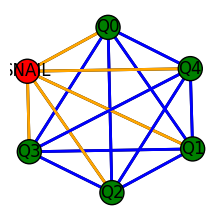

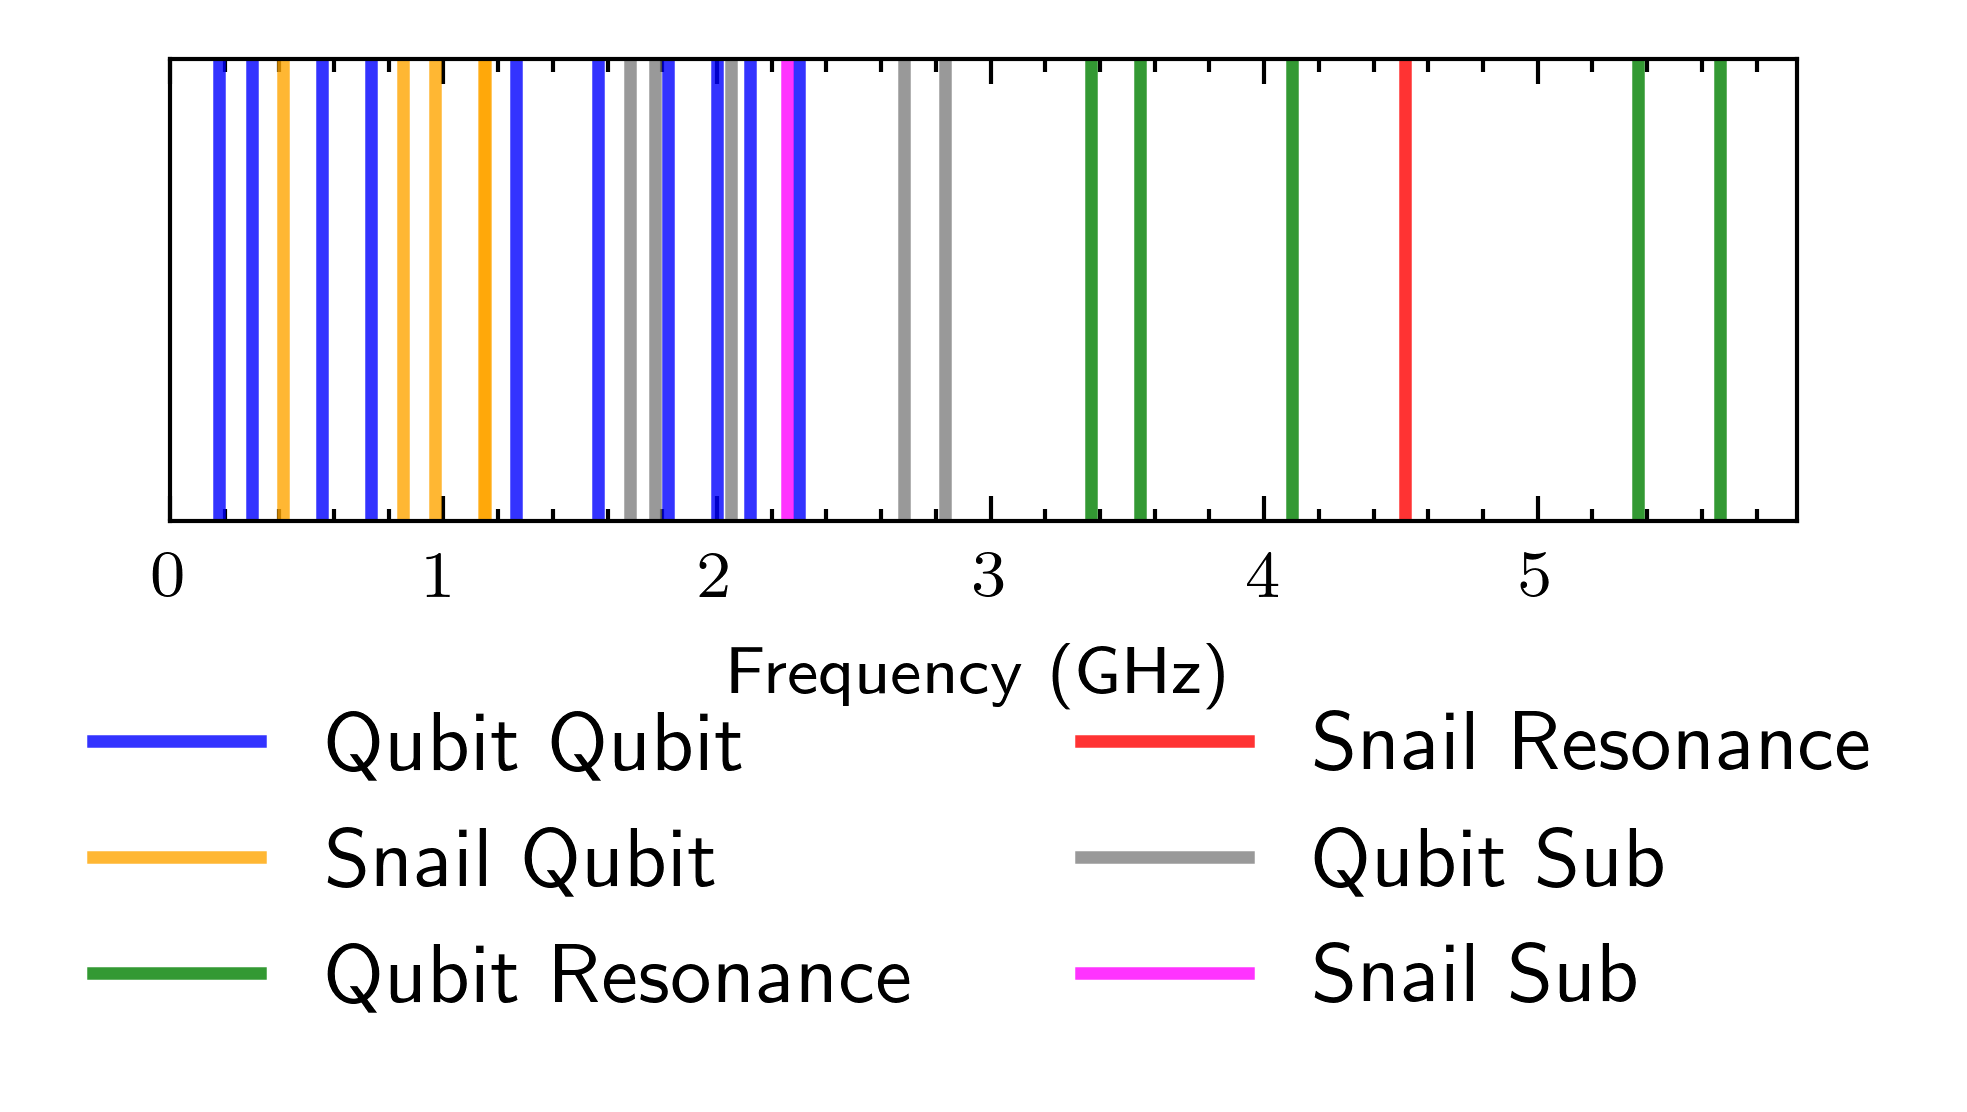

In [13]:
module = QuantumModuleGraph(num_qubits=5)
optimizer = GateFidelityOptimizer(
    module,
    min_bare_space_ghz=0.2,
    lambdaq=0.08,
    eta=1.8,
    g3=60e6,
    qubit_bounds=(3.3, 5.7),
    snail_bounds=(4.2, 4.7),
    drop_k=0,
    use_lifetime=True,
)
opt_frequencies, opt_cost = optimizer.optimize_frequencies()
optimizer.report_results()